# OneHotEncoder

_By Jeff Hale_

---

## Learning Objectives
By the end of this lesson students will be able to:

- Understand when you would want to use OneHotEncoder 
- Use OneHotEncoder to create dummy variables for training and test data
- Create a baseline model for a classification project
- Generate a confusion matrix
- Compute the sensitivity from a confusion matrix

---

## OneHotEncoder

One hot encoder is extremely helpful for dummy encoding variables for machine learning so that you don't have to worry about information from the test set leaking into the training set during the training process.

### Read in titanic data from seaborn

In [37]:
import pandas as pd
import numpy as np
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [38]:
df_titanic = sns.load_dataset('titanic', )
df_titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [39]:
df_titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.6+ KB


## Split into x and y. 

Let's use `survived` for y and `sex` and `class` for X.

In [40]:
X = df_titanic[['sex', 'class']]
y = df_titanic['survived']

In [41]:
X.head()

,sex,class
0,male,Third
1,female,First
2,female,Third
3,female,First
4,male,Third


In [42]:
y.head()

0    0
1    1
2    1
3    1
4    0
Name: survived, dtype: int64

In [43]:
y.value_counts()

0    549
1    342
Name: survived, dtype: int64

In [44]:
y.value_counts(normalize=True)

0    0.616162
1    0.383838
Name: survived, dtype: float64

## Split into training and test sets

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=7)

In [46]:
X_train.head(2)

,sex,class
709,male,Third
558,female,First


In [47]:
X_test.head(2)

,sex,class
725,male,Third
861,male,Second


In [48]:
y_train.head(2)

709    1
558    1
Name: survived, dtype: int64

In [49]:
y_test.head(2)

725    0
861    0
Name: survived, dtype: int64

### Make an object from the OneHotEncoder class. 

#### Warning! ☝️  The arguments are important here. 

In [50]:
ohe = OneHotEncoder(sparse=False, handle_unknown='ignore')
ohe

OneHotEncoder(categories='auto', drop=None, dtype=<class 'numpy.float64'>,
              handle_unknown='ignore', sparse=False)

### Save the fit and transformed training data

In [51]:
X_train_dummified = ohe.fit_transform(X_train, y_train)
X_train_dummified

array([[0., 1., 0., 0., 1.],
       [1., 0., 1., 0., 0.],
       [1., 0., 0., 1., 0.],
       ...,
       [1., 0., 1., 0., 0.],
       [0., 1., 0., 0., 1.],
       [0., 1., 0., 0., 1.]])

### Save the transformed `X_test`

In [52]:
X_test_dummified = ohe.transform(X_test)
X_test_dummified

array([[0., 1., 0., 0., 1.],
       [0., 1., 0., 1., 0.],
       [0., 1., 0., 0., 1.],
       ...,
       [0., 1., 0., 0., 1.],
       [0., 1., 0., 0., 1.],
       [1., 0., 0., 1., 0.]])

In [53]:
pd.get_dummies(X_train)

,sex_female,sex_male,class_First,class_Second,class_Third
709,0,1,0,0,1
558,1,0,1,0,0
327,1,0,0,1,0
256,1,0,1,0,0
51,0,1,0,0,1
...,...,...,...,...,...
579,0,1,0,0,1
502,1,0,0,0,1
537,1,0,1,0,0
196,0,1,0,0,1


## Make a LogisticRegression model

In [54]:
logreg = LogisticRegression()


### Fit the model

In [55]:
logreg.fit(X_train_dummified, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

### Create the model predictions

In [56]:
preds = logreg.predict(X_test_dummified)

In [57]:
preds

array([0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1,
       1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1])

In [58]:
logreg.score(X_test_dummified, y_test)

0.7309417040358744

### Generate the confusion matrix

In [59]:
confusion_matrix(y_test, preds)

array([[111,  24],
       [ 36,  52]])

In [60]:
tn, fp, fn, tp = confusion_matrix(y_test, preds).ravel()
tn

111

In [61]:
fp

24

In [62]:
fn

36

In [63]:
tp

52

### Try out the plot_confusion_matrix method

In [64]:
from sklearn.metrics import plot_confusion_matrix

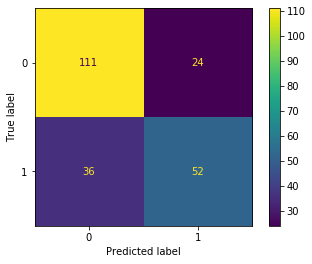

In [67]:
plot_confusion_matrix(logreg, X_test_dummified, y_test, values_format = '.5g')

Accuracy = 73%

#### Compute the True Postive Rate

In [69]:
tp/(tp+fn)

0.5909090909090909

#### Compute the Sensitivity

#### Compute the Recall

#### Compute the Precision

In [70]:
tp / (tp + fp)

0.6842105263157895

#### Compute the Specificity

In [71]:
tn/ (tn + fp)

0.8222222222222222

In [74]:
from sklearn.metrics import recall_score, precision_score

In [73]:
recall_score(y_test, preds)

0.5909090909090909

In [75]:
precision_score(y_test, preds)

0.6842105263157895

In [76]:
from sklearn.metrics import classification_report

In [78]:
classification_report(y_test, preds, output_dict=True)

{'0': {'precision': 0.7551020408163265,
  'recall': 0.8222222222222222,
  'f1-score': 0.7872340425531914,
  'support': 135},
 '1': {'precision': 0.6842105263157895,
  'recall': 0.5909090909090909,
  'f1-score': 0.6341463414634148,
  'support': 88},
 'accuracy': 0.7309417040358744,
 'macro avg': {'precision': 0.719656283566058,
  'recall': 0.7065656565656566,
  'f1-score': 0.7106901920083031,
  'support': 223},
 'weighted avg': {'precision': 0.7271269140179083,
  'recall': 0.7309417040358744,
  'f1-score': 0.7268227524370463,
  'support': 223}}

## Baseline model

In [42]:
y_train.value_counts(normalize=True)

0    0.61976
1    0.38024
Name: survived, dtype: float64

#### Predict the most common class every time.

In [43]:
from sklearn.metrics import accuracy_score

In [45]:
accuracy_score(np.zeros_like(y_test), y_test)

0.6053811659192825

### How does our LogisticRegression model perform compared to the baseline model?

### How could we try to improve our model?

# Summary

You've seen how to use OneHotEncoder.

You've practiced computing the recall.

### Check for Understanding

- Why would you want to use OneHotEncoder instead of pd.get_dummies()?

- How do you use OneHotEncoder with the test data?